## PCA and FA Olivetti Faces Database

### PCA

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn import metrics
from time import time

In [22]:
data = np.load("/Users/jbeiting/Desktop/CS_539/data/olivetti_faces.npy")
target = np.load("/Users/jbeiting/Desktop/CS_539/data/olivetti_faces_target.npy")

In [29]:
def show_40(images, unique_ids):
    fig, axarr = plt.subplots(nrows = 4, ncols = 10, figsize = (18, 9))
    axarr = axarr.flatten()
    
    for unique_id in unique_ids:
        image_index = unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle('40 distinct people in the dataset')

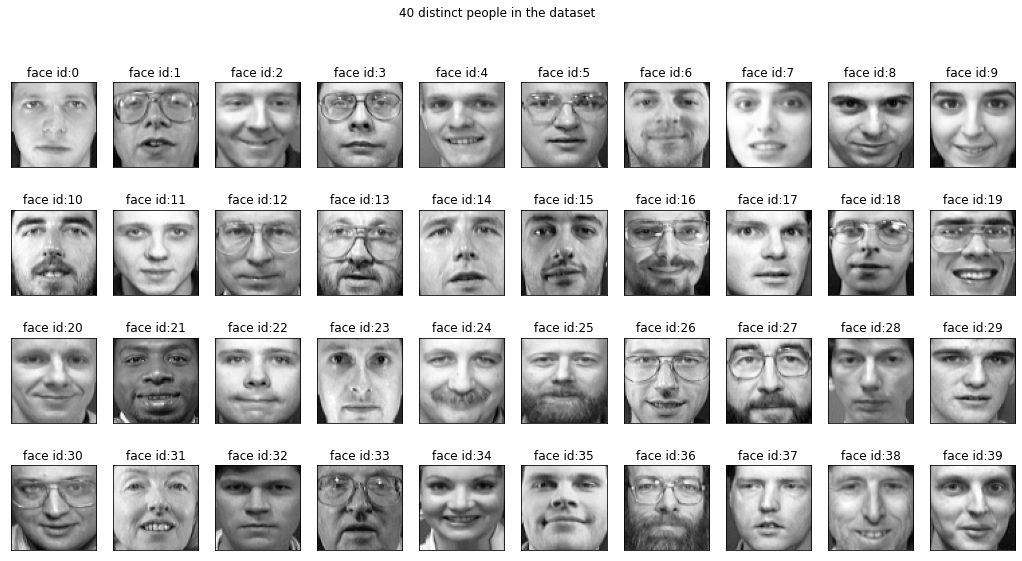

In [38]:
show_40(data, np.unique(target))

## Finding appropriate number of compenents to reduce dimensionality 

In [40]:
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("data shape: ", data.shape)
print("X shape: ", X.shape)

data shape: (400, 64, 64)
X shape: (400, 4096)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.1, stratify = target, random_state = 0)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (360, 4096)
y_train shape:  (360,)
X_test shape:  (40, 4096)
y_test shape:  (40,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

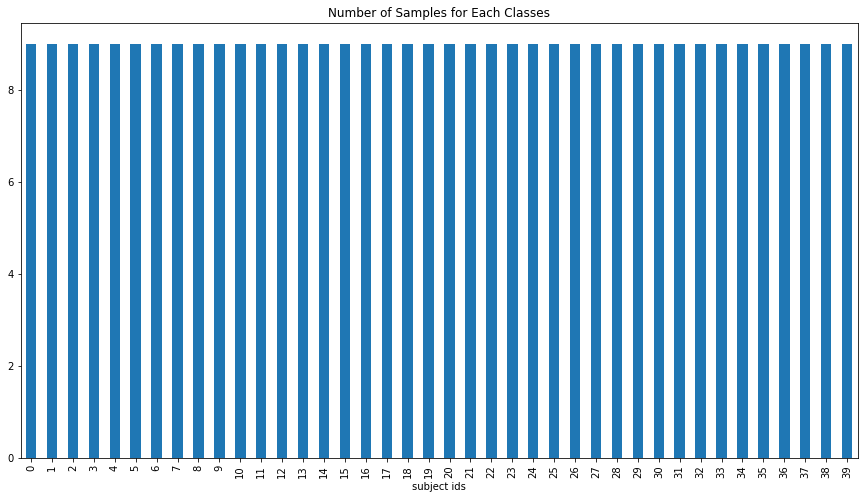

In [63]:
y_frame=pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

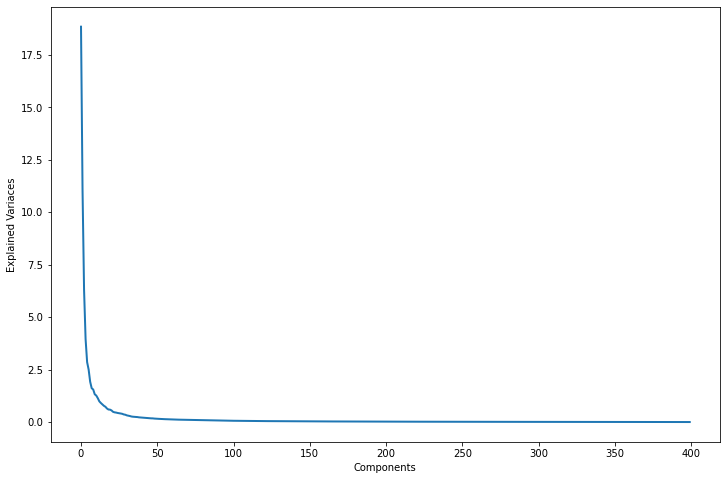

In [100]:
pca = PCA()
pca.fit(X)
plt.figure(1, figsize=(12,8))
plt.plot(pca.explained_variance_, linewidth = 2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [98]:
pca = PCA(n_components = 100)
print('PCA: ', pca)
pca.fit(X)
X_pca = pca.transform(X)
print("PCA Shape: ", X_pca.shape)
print("X Shape: ", X.shape)

PCA:  PCA(n_components=100)
PCA Shape:  (400, 100)
X Shape:  (400, 4096)


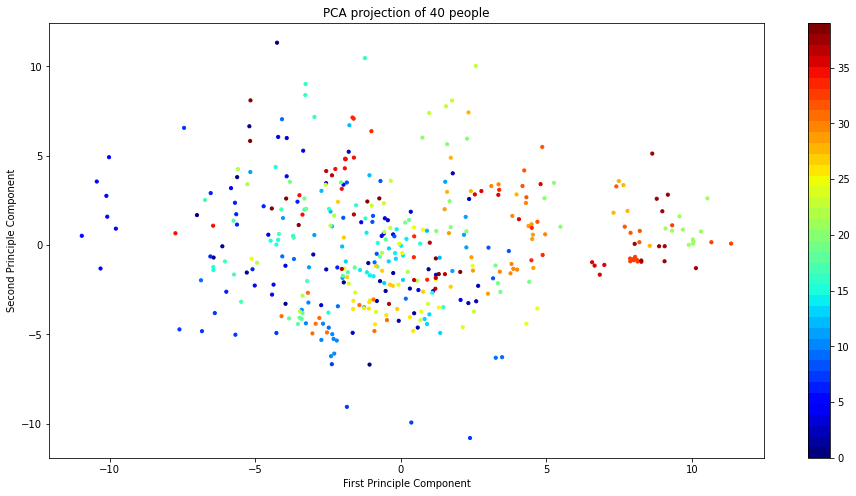

In [99]:
number_of_people = 40
index_range=number_of_people*40
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

### Cluster Faces of 5 

In [71]:
def show_5(images, subject_ids):
    cols = 5
    rows = len(subject_ids)*5/cols
    rows = int(rows)
    print('number of rows', rows)
    
    fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (18, 9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))


number of rows 5


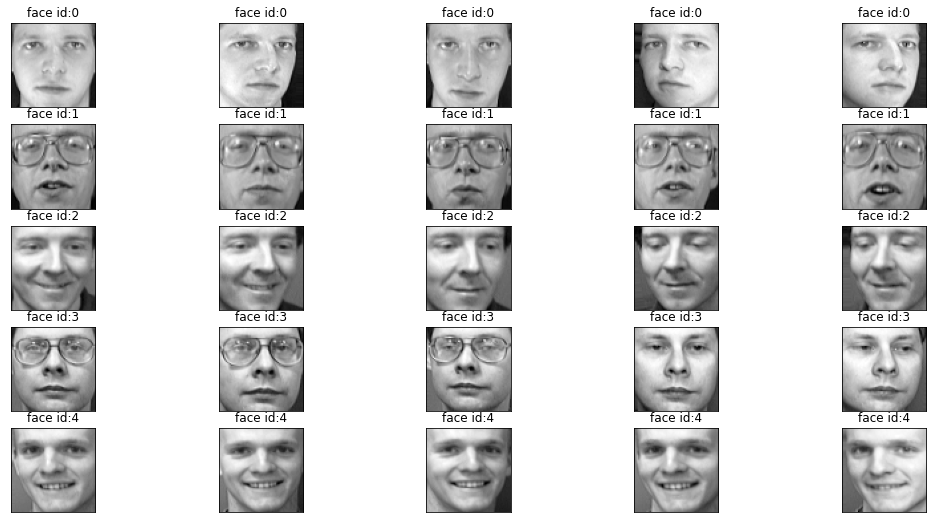

In [72]:
show_5(data, [0,1,2,3,4])

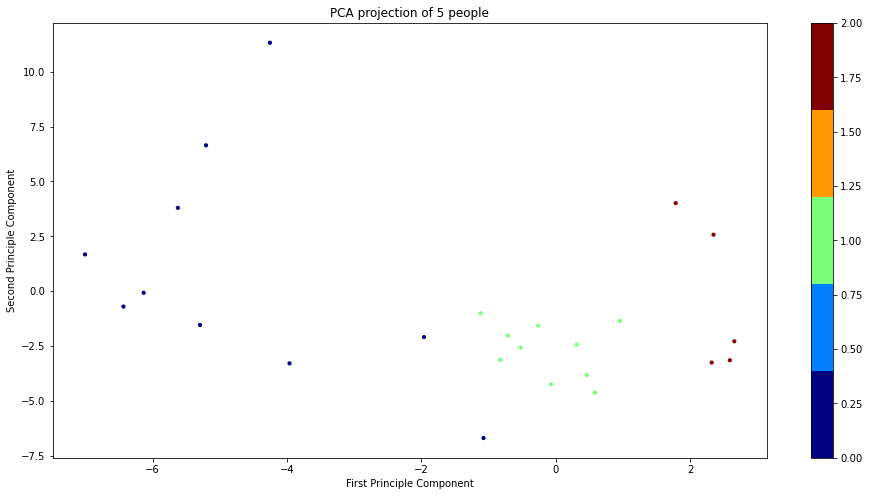

In [73]:
number_of_people = 5
index_range = number_of_people*5
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
            cmap=plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

### Cluster Faces of 10

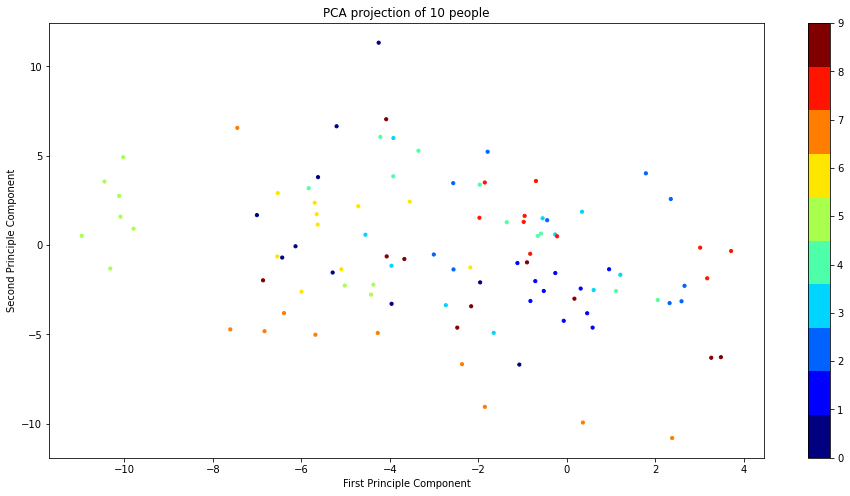

In [74]:
number_of_people = 10
index_range = number_of_people*10
fig=plt.figure(figsize = (16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
            cmap=plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

### Cluster Faces of 20

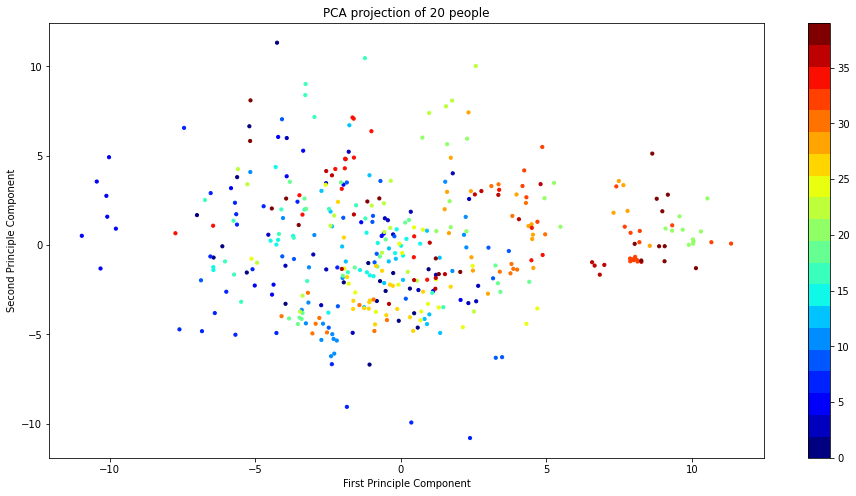

In [75]:
number_of_people = 20
index_range = number_of_people*20
fig=plt.figure(figsize = (16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

## Factor Analysis 

In [76]:
from sklearn.decomposition import FactorAnalysis 
from sklearn.datasets import fetch_olivetti_faces
from numpy import reshape
import seaborn as sns
import pandas as pd
from numpy import where
import matplotlib.pyplot as plt 

fa = FactorAnalysis(n_components = 100)
print('FA: ', fa)
fa.fit(X)
X_fa = fa.transform(X)
print("FA Shape: ", X_fa.shape)
print("X Shape: ", X.shape)

## Cluster of 40

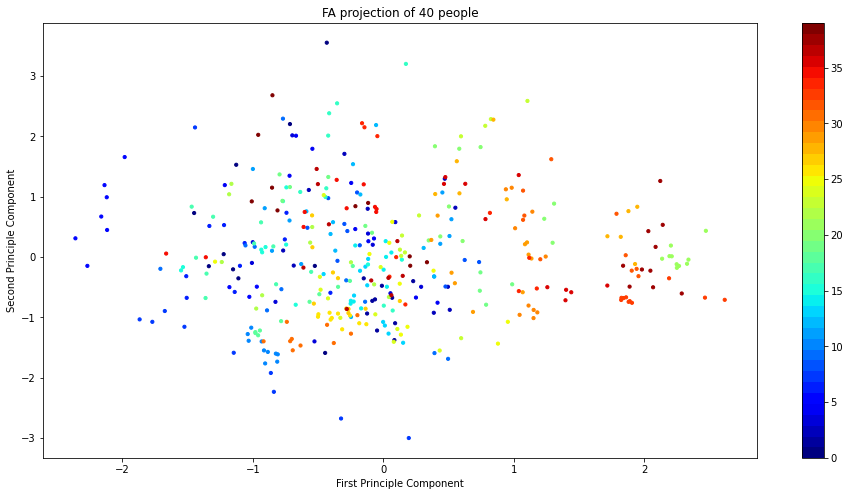

In [94]:
number_of_people = 40
index_range=number_of_people*40
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_fa[:index_range,0],
            X_fa[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("FA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

## Cluster of 20 

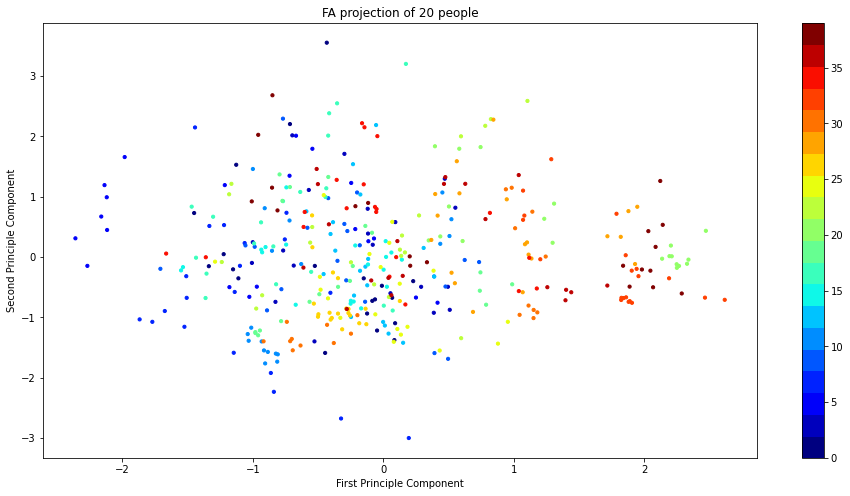

In [95]:
number_of_people = 20
index_range = number_of_people*20
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_fa[:index_range,0],
            X_fa[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("FA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

## Cluster of 10 

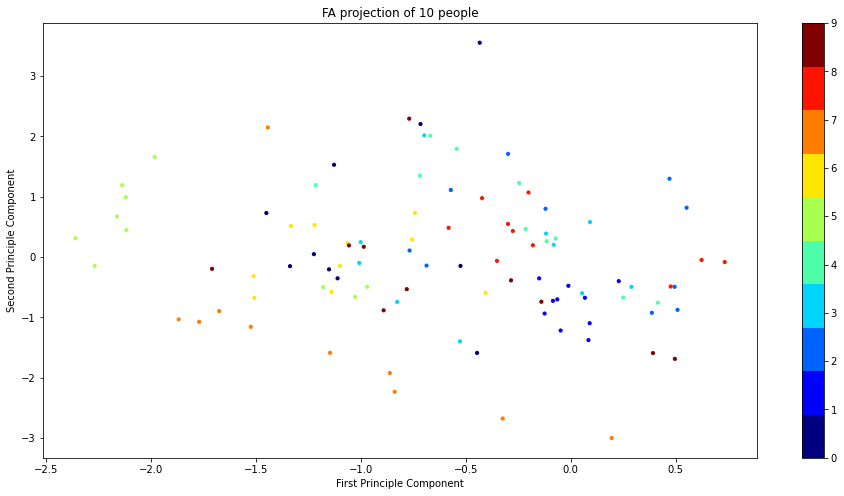

In [96]:
number_of_people = 10
index_range = number_of_people*10
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_fa[:index_range,0],
            X_fa[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("FA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

## Cluster of 5

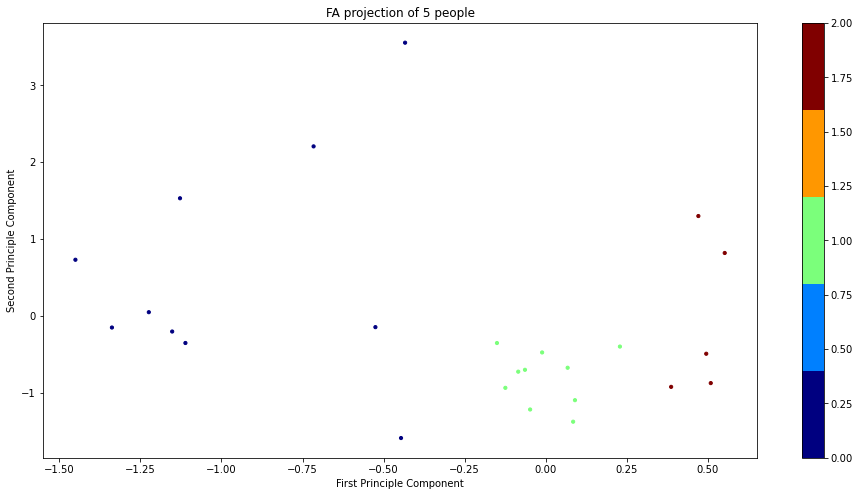

In [97]:
number_of_people = 5
index_range = number_of_people*5
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_fa[:index_range,0],
            X_fa[:index_range,1], 
            c = target[:index_range],
            s = 10,
            cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("FA projection of {} people".format(number_of_people))

fig.colorbar(scatter)